In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
def loader():
  with np.load('/content/drive/My Drive/ECE421/notMNIST.npz') as data :
    Data, Target = data ['images'], data['labels']
    posClass = 2
    negClass = 9
    dataIndx = (Target==posClass) + (Target==negClass)
    Data = Data[dataIndx]/255.
    Target = Target[dataIndx].reshape(-1, 1)
    Target[Target==posClass] = 1
    Target[Target==negClass] = 0
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data, Target = Data[randIndx], Target[randIndx]
    trainData, trainTarget = Data[:3500], Target[:3500]
    validData, validTarget = Data[3500:3600], Target[3500:3600]
    testData, testTarget = Data[3600:], Target[3600:]
  return trainData, trainTarget, validData, validTarget, testData, testTarget


Mounted at /content/drive


train_accuracy is %d 0.9682857142857143
valid_accuracy is %d 0.96
train_loss is %d 0.19435875264881913
valid_loss is %d 0.26120341524269186


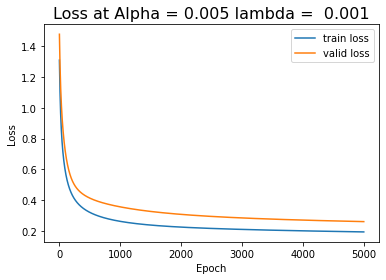

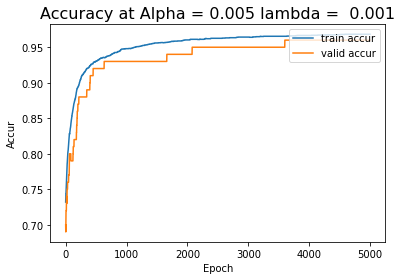

train_accuracy is %d 0.9742857142857143
valid_accuracy is %d 0.97
train_loss is %d 0.17700338746636424
valid_loss is %d 0.1687953820922075


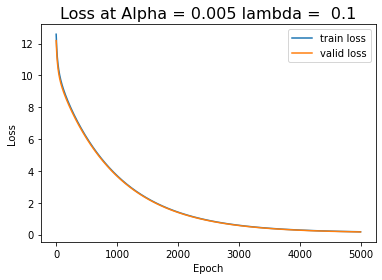

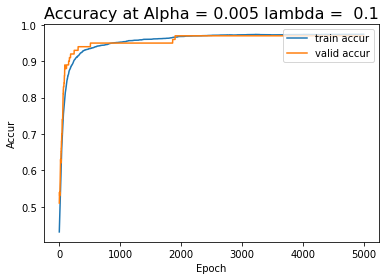

train_accuracy is %d 0.968
valid_accuracy is %d 0.97
train_loss is %d 0.19857196873886307
valid_loss is %d 0.19792853250902026


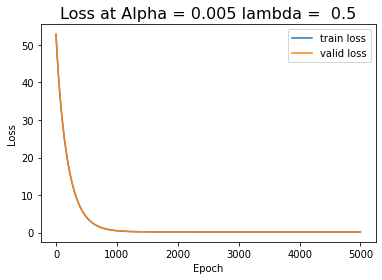

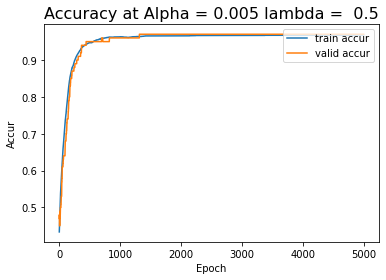

In [ ]:

def loss(W, b, x, y, reg):
    z = np.matmul(x,W)+b
    y_ = 1/(1+np.exp(-z))
    loss_CE = np.sum(-(y*np.log(y_)) - (1-y)*np.log(1-y_))
    loss_CE = loss_CE/(np.shape(y)[0])
    loss_w = reg/2*np.sum(W*W)
    loss = loss_CE+loss_w

    return loss

def grad_loss(W, b, x, y, reg):
    dLw = reg*W
    z = np.matmul(x,W)+b
    y_ = 1/(1+np.exp(-z))
    dLCE = np.matmul(np.transpose(x),y_-y)
    grad_W = dLCE/(np.shape(y)[0])+dLw
    grad_b = np.sum(y_ - y)/(np.shape(y)[0])
    return grad_W,grad_b


def grad_descent(W, b, x, y, alpha, epochs, reg, error_tol):
    for i in range(epochs):
      grad_lossW, grad_lossb = grad_loss(W,b,x,y,reg)
      W_ = W-alpha*grad_lossW
      b_ = b-alpha*grad_lossb
      diff = np.linalg.norm(W_-W)
      if (diff < error_tol):
        return W_,b_
      else:
        W = W_
        b = b_
    return W_,b_

def tuning(W, b, trainData, trainTarget, validData, validTarget, alpha, epochs, reg, error_tol = 10^(-7)):
  train_loss = []
  valid_loss = []
  train_accur = []
  valid_accur = []
  for i in range(epochs):
      grad_lossW, grad_lossb = grad_loss(W, b, trainData, trainTarget, reg)
      W_ = W-alpha * grad_lossW
      b_ = b-alpha*grad_lossb
      train_loss.append(loss(W_,b_,trainData,trainTarget,reg))
      valid_loss.append(loss(W_,b_,validData,validTarget,reg))
      trained_result = np.matmul(trainData,W_)
      train_accur.append(np.sum((trained_result>=0.5)==trainTarget)/(trainData.shape[0]))

      valid_result = np.matmul(validData,W_)
      valid_accur.append(np.sum((valid_result>=0.5)==validTarget)/(validTarget.shape[0]))

      diff = np.linalg.norm(W_-W)
      if diff<error_tol:
          return train_loss, valid_loss, train_accur, valid_accur
      else:
          W = W_
          b = b_
  print("train_accuracy is %d", np.max(train_accur))
  print("valid_accuracy is %d", np.max(valid_accur))
  print("train_loss is %d", np.min(train_loss))
  print("valid_loss is %d", np.min(valid_loss))
  return train_loss, valid_loss, train_accur, valid_accur

def plot(train, valid, alpha, reg, type):
  iterations = range(len(train))
  plt.plot(iterations,train)
  plt.plot(iterations,valid)
  
  if (type == "loss"):
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(['train loss', 'valid loss'], loc='upper right')
    plt.title('Loss at Alpha = %s lambda =  %s' %(alpha,  reg), fontsize=16)
  else:
    plt.xlabel("Epoch")
    plt.ylabel("Accur")
    plt.legend(['train accur', 'valid accur'], loc='upper right')
    plt.title('Accuracy at Alpha = %s lambda =  %s' %(alpha,  reg), fontsize=16)
  plt.show()
  return 
trainData, trainTarget, validData, validTarget, testData, testTarget = loader()
trainData = trainData.reshape((trainData.shape[0], trainData.shape[1]*trainData.shape[2]))
validData = validData.reshape((-1,validData.shape[1]*validData.shape[2]))
W = np.random.normal(0, 0.5, (trainData.shape[1],1))
reg = 0.001
alpha = 0.005
epochs = 5000
b = 0
train_loss, valid_loss, train_accur, valid_accur = tuning(W,b,trainData, trainTarget, validData, validTarget, alpha, epochs, reg)
plot(train_loss, valid_loss, alpha, reg, "loss")
plot(train_accur, valid_accur, alpha, reg, "accur")
W = np.random.normal(0, 0.5, (trainData.shape[1],1))
reg = 0.1
alpha = 0.005
epochs = 5000
b = 0
train_loss, valid_loss, train_accur, valid_accur = tuning(W,b,trainData, trainTarget, validData, validTarget, alpha, epochs, reg)
plot(train_loss, valid_loss, alpha, reg, "loss")
plot(train_accur, valid_accur, alpha, reg, "accur")
W = np.random.normal(0, 0.5, (trainData.shape[1],1))
reg = 0.5
alpha = 0.005
epochs = 5000
b = 0
train_loss, valid_loss, train_accur, valid_accur = tuning(W,b,trainData, trainTarget, validData, validTarget, alpha, epochs, reg)
plot(train_loss, valid_loss, alpha, reg, "loss")
plot(train_accur, valid_accur, alpha, reg, "accur")

train_accuracy is %d 0.9954285714285714
valid_accuracy is %d 0.99
train_loss is %d 0.018698029220104218
valid_loss is %d 0.025957208


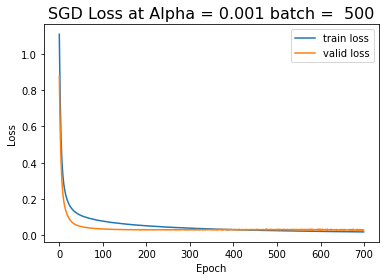

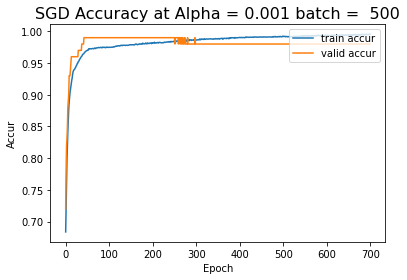

train_accuracy is %d 0.9994285714285716
valid_accuracy is %d 1.0
train_loss is %d 0.007034779690106266
valid_loss is %d 0.0052656718


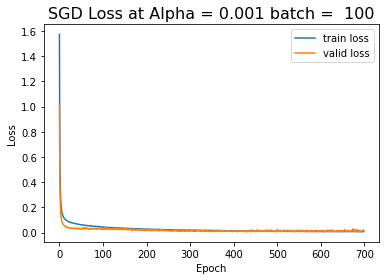

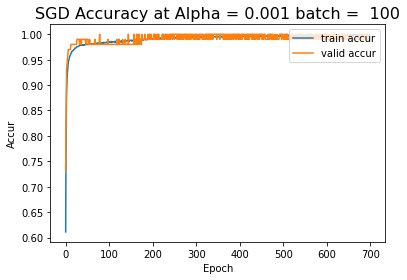

train_accuracy is %d 0.9937142857142858
valid_accuracy is %d 0.99
train_loss is %d 0.023409127630293368
valid_loss is %d 0.03652866


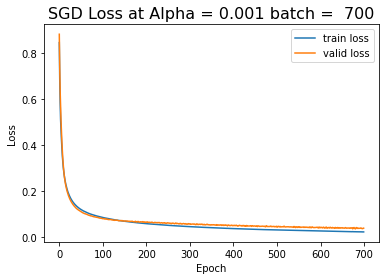

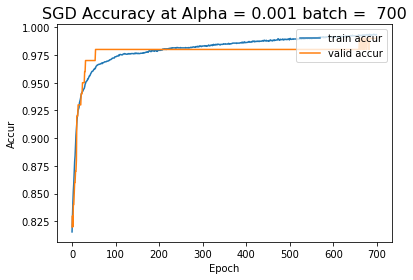

train_accuracy is %d 0.9831428571428571
valid_accuracy is %d 0.98
train_loss is %d 0.052692849189043045
valid_loss is %d 0.058110744


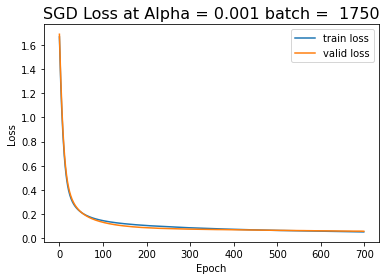

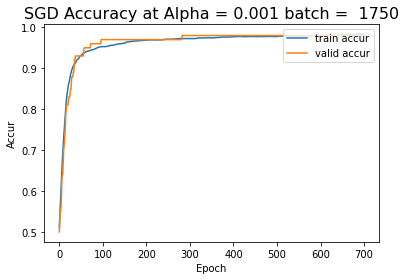

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
def buildGraph(shape_x, alpha, beta1=None, beta2=None, epsilon=None):
  
  
  W = tf.Variable(tf.random.truncated_normal((shape_x, 1), mean=0, stddev=0.5))
  b = tf.Variable(0, dtype=tf.float32)
  x = tf.placeholder(tf.float32, shape=(None, shape_x))
  y = tf.placeholder(tf.float32, shape=(None, 1))
  reg = tf.placeholder(tf.float32, shape=None)

  z = tf.matmul(x,W)+b
  
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)) + reg*tf.nn.l2_loss(W)
  optimizer = tf.train.AdamOptimizer(alpha,epsilon=1e-4).minimize(loss)
  train_prediction = tf.nn.sigmoid(z)

  return W, b, x, y, train_prediction, loss, optimizer, reg
  #https://www.ritchieng.com/machine-learning/deep-learning/tensorflow/regularization/
def SGD(epochs, batch_size, alpha):
  lam = 0
  train_loss = []
  valid_loss = []
  train_accur = []
  valid_accur = []
  test_accur = []
  trainData, trainTarget, validData, validTarget, testData, testTarget = loader()
  trainData = trainData.reshape((trainData.shape[0], trainData.shape[1]*trainData.shape[2]))
  validData = validData.reshape((-1,validData.shape[1]*validData.shape[2]))
  testData = testData.reshape((-1,testData.shape[1]*testData.shape[2]))
  shape_x = trainData.shape[1]
  W, b, x, y, train_prediction, loss, optimizer, reg = buildGraph(shape_x,alpha)
  num_batch = int(len(trainTarget)/batch_size)
  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for i in range(epochs):
      idx = np.random.permutation(len(trainTarget))
      trainData, trainTarget = trainData[idx], trainTarget[idx]
      loss_train=0
      accur_train=0
      for n in range(num_batch):
        batch_data = trainData[n*batch_size: (n+1)*batch_size]
        batch_label =  trainTarget[n*batch_size: (n+1)*batch_size]
        train_p, train_l, label, op = session.run([train_prediction, loss, y, optimizer], 
                                  feed_dict={x: batch_data, y: batch_label, reg: lam})
        train_a = np.sum((train_p>0.5)==label)/batch_size#accuracy(train_p,trainTarget)
        loss_train+=train_l
        accur_train+=train_a
      train_loss.append(loss_train/num_batch)
      train_accur.append(accur_train/num_batch)

      p, valid_l, label = session.run([train_prediction, loss, y], 
                          feed_dict={x: validData, y: validTarget, reg: lam})
      valid_loss.append(valid_l)
      valid_accur.append(np.sum((p>0.5)==label)/label.shape[0])

      p, test_l, labelt = session.run([train_prediction, loss, y], 
                          feed_dict={x: testData, y: testTarget, reg: lam})
      test_accur.append(np.sum((p>0.5)==labelt)/len(labelt))
   
    print("train_accuracy is %d", np.max(train_accur))
    print("valid_accuracy is %d", np.max(valid_accur))
    print("train_loss is %d", np.min(train_loss))
    print("valid_loss is %d", np.min(valid_loss))
    plot1(train_loss, valid_loss, alpha, batch_size, "loss")
    plot1(train_accur, valid_accur, alpha, batch_size, "accur")
  return train_loss, valid_loss, train_accur, valid_accur
 """print("train_accuracy is %d", np.max(train_accur))
    print("valid_accuracy is %d", np.max(valid_accur))
    print("test_accuracy is %d", np.max(test_accur))
    plt.plot(range(epochs), train_accur, label="Train")
    plt.plot(range(epochs), valid_accur, label="Validation")
    plt.plot(range(epochs), test_accur, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Accuarcy")
    plt.legend(loc='best')
    plt.title('SGD Accuracy at epsilon = %s' %1e-4, fontsize=16)
    plt.show()
    """
def plot1(train, valid, alpha, batch, type):
  iterations = range(len(train))
  plt.plot(iterations,train)
  plt.plot(iterations,valid)
  
  if (type == "loss"):
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(['train loss', 'valid loss'], loc='upper right')
    plt.title('SGD Loss at Alpha = %s batch =  %s' %(alpha, batch), fontsize=16)
  else:
    plt.xlabel("Epoch")
    plt.ylabel("Accur")
    plt.legend(['train accur', 'valid accur'], loc='upper right')
    plt.title('SGD Accuracy at Alpha = %s batch =  %s' %(alpha, batch), fontsize=16)
  plt.show()
  return 
train_loss, valid_loss, train_accur, valid_accur = SGD(700,500,0.001)
train_loss, valid_loss, train_accur, valid_accur = SGD(700,100,0.001)
train_loss, valid_loss, train_accur, valid_accur = SGD(700,700,0.001)
train_loss, valid_loss, train_accur, valid_accur = SGD(700,1750,0.001)